# Cordex domains

The domain module should give some tools to work with preconfigured or user defined domains. Domains are defined as xarray datasets that will contain dimensions and coodinates according to CF-conventions.

## EUR-11 example

In [1]:
from cordex import domain as dm

In [2]:
eur11 = dm.cordex_domain('EUR-11', dummy='topo')
eur11

<xarray.Dataset>
Dimensions:                     (rlat: 412, rlon: 424)
Coordinates:
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.05 18.16
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.73 21.84
    lon                         (rlat, rlon) float64 -10.06 -9.964 ... 64.96
    lat                         (rlat, rlon) float64 21.99 22.03 ... 66.75 66.69
Data variables:
    rotated_latitude_longitude  int32 0
    topo                        (rlat, rlon) float32 ...

The `dummy='topo'` argument means, we want a dummy variable in the dataset to see how the domain looks like. For the dummy topography, we use the `cdo topo` operator in the background. So maybe you have to install `python-cdo`, e.g., `conda install -c conda-forge python-cdo`. Working with xarray datasets means, that we can use all the nice functions of xarray including plotting, e.g.,

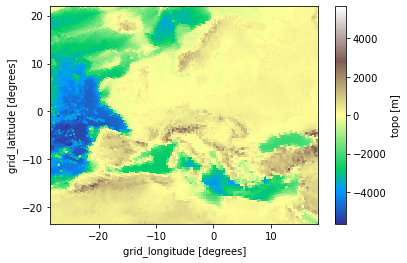

In [4]:
eur11.topo.plot(cmap='terrain')

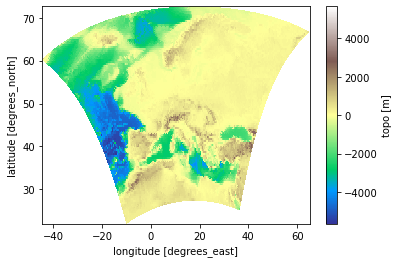

In [5]:
eur11.topo.plot(x='lon', y='lat', cmap='terrain')

Let's define a slightly more sophisticated plotting function that uses cartopy for the right [projection](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html) with a rotated pole:

In [29]:
def plot(da, pole, vmin=None, vmax=None, borders=True, title=''):
    """plot a domain using the right projection with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
    projection = ccrs.PlateCarree()
    transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
    #ax = plt.axes(projection=projection)
    ax = plt.axes(projection=transform)
    #ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                      xlocs=range(-180,180,10), ylocs=range(-90,90,5))
    da.plot(ax=ax, cmap='terrain', transform=transform, vmin=vmin, vmax=vmax, x='rlon', y='rlat')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    if borders: ax.add_feature(cf.BORDERS)
    ax.set_title('')

In [30]:
pole = eur11.rotated_latitude_longitude.grid_north_pole_longitude, eur11.rotated_latitude_longitude.grid_north_pole_latitude
pole

(-162.0, 39.25)

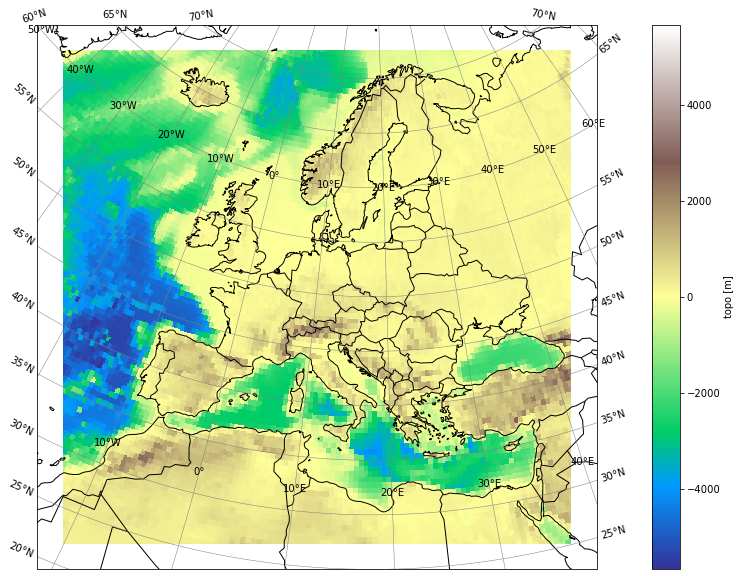

In [31]:
plot(eur11.topo, pole)

## Check out the Africa domain!

In [37]:
afr11 = dm.cordex_domain('AFR-11', dummy='topo')
afr11

<xarray.Dataset>
Dimensions:                     (rlat: 804, rlon: 776)
Coordinates:
  * rlon                        (rlon) float64 -24.8 -24.7 ... 60.34 60.45
  * rlat                        (rlat) float64 -45.92 -45.81 ... 42.3 42.41
    lon                         (rlat, rlon) float64 -24.81 -24.7 ... 60.44
    lat                         (rlat, rlon) float64 -45.92 -45.92 ... 42.41
Data variables:
    rotated_latitude_longitude  int32 0
    topo                        (rlat, rlon) float32 ...

In [38]:
pole = afr11.rotated_latitude_longitude.grid_north_pole_longitude, afr11.rotated_latitude_longitude.grid_north_pole_latitude
pole

(180.0, 90.0)

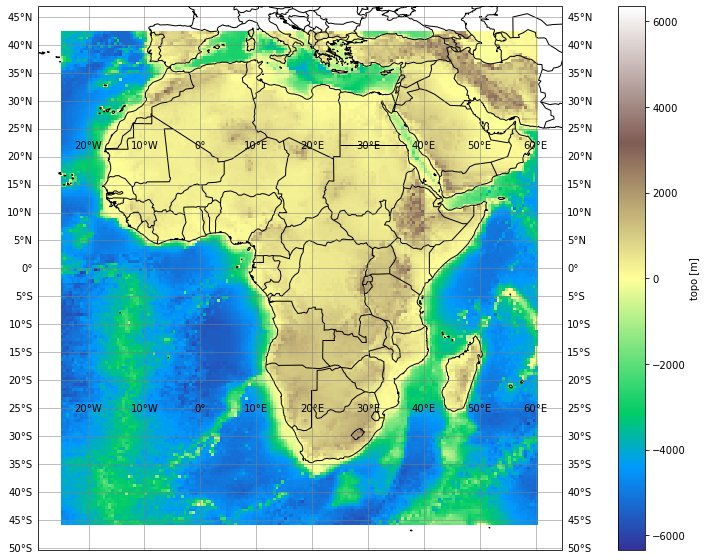

In [39]:
plot(afr11.topo, pole)